### Part4: Visualise training data on a 2-dimensional plot by taking suitable features to visualise decision tree boundary.

In [10]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv("decision_Tree/train.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,1,0,sales,low
1,0.89,0.93,4,249,3,0,0,0,sales,low
2,0.38,0.50,2,132,3,0,1,0,accounting,low
3,0.95,0.71,4,151,4,0,0,0,sales,medium
4,0.84,0.84,5,163,3,0,0,0,technical,low


In [12]:
split = int(0.8 * df.shape[0])

training_data = df[:split] # 80% of the total data
testing_data = df[split:]  # 20% of the total data

In [13]:
def count_Unique(col):
    d={} # empty dictionary
    for i in col:
        if i not in d:
            d[i]=1
        else:
            d[i]+=1
    return d

def TotalEntropy(Z):
    freq=count_Unique(Z)
    ent=0.0
    total=len(Z)
    for i in freq:
        prob=freq[i]/total
        ent+=-prob*np.log2(prob)
    return ent

In [14]:
def entropy_attribute(df,attribute):
   
    
    var=list(set(df[attribute]))
    entropy_final=0
    for i in var:
        val1=len(df[attribute][df[attribute]==i][df.left == 1])
        val2=len(df[attribute][df[attribute]==i])
        if val1 == 0 or val2 == 0 or val1==val2:
            entropy_temp = 0
        else:
            ent = val1 / (val2)
            entropy_temp=-((ent * (np.log2(ent))) + ((1 - ent) * (np.log2(1-ent))))
      
   
        ent2=val2/len(training_data)
        entropy_final+=ent2*entropy_temp

    return entropy_final

In [15]:
def information_gain(df,attribute):
    if not attribute:
        return 'empty'
    
    totalEntropy=TotalEntropy(df['left'])
    max = 0
    select_attr = 0

    for i in attribute:
        wightedEntropy = entropy_attribute(df,i)
        info_gain = totalEntropy - wightedEntropy
        if info_gain >= max :
                 max = info_gain
                 select_attr = i

    return select_attr

#### Finding the Feature of Maximum informationGain 

In [16]:
featureSets = ['sales','promotion_last_5years','salary',  'Work_accident','last_evaluation','satisfaction_level','number_project','average_montly_hours','time_spend_company']
information_gain(training_data,featureSets)

'satisfaction_level'

#### Finding the Feature of ${2nd}$ Maximum informationGain by removing the highest one from the list 

In [17]:
featureSets = ['sales','promotion_last_5years','salary',  'Work_accident','last_evaluation','number_project','average_montly_hours','time_spend_company']
information_gain(training_data,featureSets)

'number_project'

#### Plotting the Scatter plot and Visualise the Decision Boundry

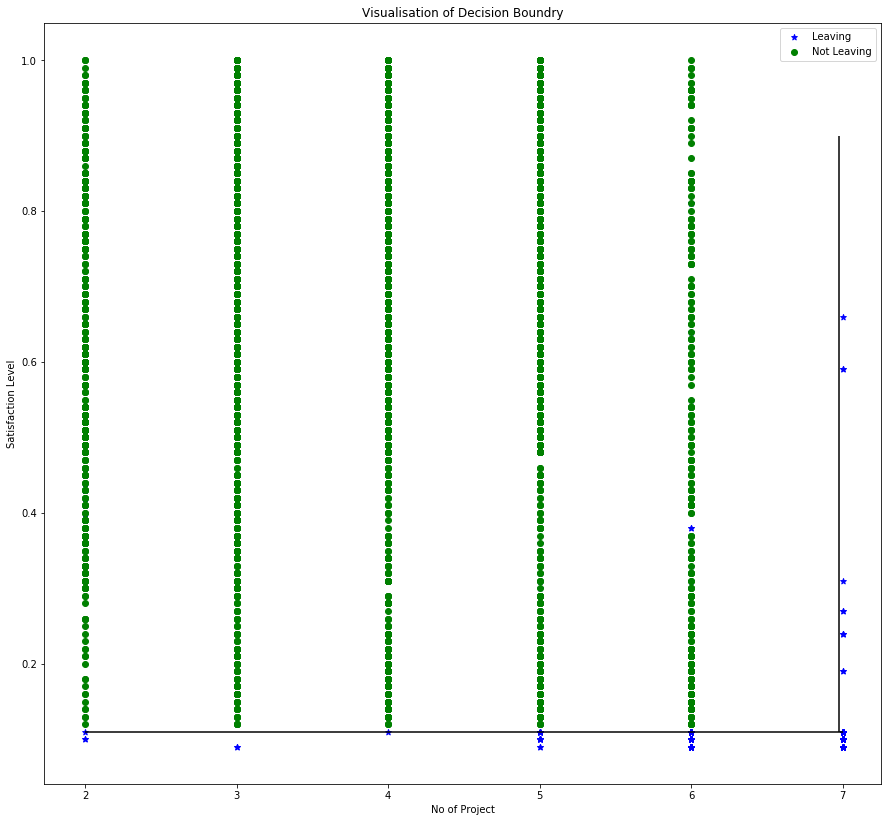

In [18]:

plt.rcParams['figure.figsize']=(15,14)
xyes=list(training_data['number_project'][training_data['left']==1])
xno=list(training_data['number_project'][training_data['left']==0])

yyes=list(training_data['satisfaction_level'][training_data['left']==1])
yno=list(training_data['satisfaction_level'][training_data['left']==0])

plt.scatter(xyes,yyes,label="Leaving",color="blue",marker="*")
plt.scatter(xno,yno,label="Not Leaving",color="green")


plt.legend(loc='upper right');

#plt.axhline(.1+.01, color='black')
plt.hlines(.1+.01,2,7,color='k',label='Decision Boundry')
plt.vlines(7-.02,.1+.01,1-.1,color='k',label='Decision Boundry')

plt.xlabel('No of Project')
plt.ylabel('Satisfaction Level')
plt.title('Visualisation of Decision Boundry')

plt.show()
